In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts
import seaborn as sns

sns.set()

In [3]:
path=r'D:\DataSets\365\TimeSeries\3\index2018.csv'
path='/'.join(str(path).split('\\'))
raw_data=pd.read_csv(path)
df=raw_data.copy()

In [4]:
del df['spx'],df['dax'],df['nikkei']

In [5]:
df['date']=pd.to_datetime(df['date'],dayfirst=True)
df.set_index(keys='date',inplace=True)
df=df.asfreq('b')
df['ftse']=df.ftse.fillna(method='ffill')

In [6]:
size=int(len(df.ftse)*.8)

In [7]:
df_train,test=df.iloc[:size],df.iloc[size:]

In [8]:
def llr_test(simple,complicated,df=1):
    l1=simple.fit().llf
    l2=complicated.fit().llf
    lr=(2*(l2-l1)) # Why I use this here?
    p=chi2.sf(lr,df).round(3)
    return p

### aDF-Test


In [9]:
sts.adfuller(df_train)

(-1.904155141883686,
 0.3301089327702835,
 6,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54854.15304507557)

### Using Return

In [10]:
df_train['returns']=df_train.ftse.pct_change(periods=1).mul(100).round(2)
#to delete the first of with NaN in returns due to missing of previos periode
df_train=df_train.iloc[1:]

<ipython-input-10-21acd7f6db94>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['returns']=df_train.ftse.pct_change(periods=1).mul(100).round(2)


In [11]:
sts.adfuller(df_train.returns)

(-12.77388692613383,
 7.666979513982823e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 15695.989790251202)

This is definitve stationary data due to:<br> t-value > 1%,5% and 10% criticalt value --> outside of CI <br> p-value smaller than 1,5 o 10

## ACF & PACF of ftse returns

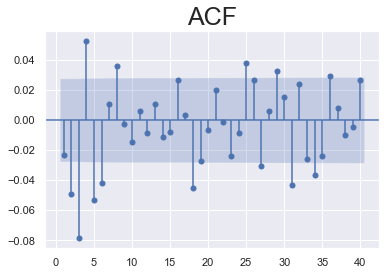

In [12]:
sgt.plot_acf(df_train.returns,lags=40,zero=False)
plt.title('ACF',size=25);

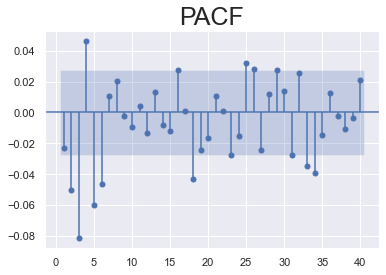

In [13]:
sgt.plot_pacf(df_train.returns,lags=40,zero=False,method='ols')
plt.title('PACF',size=25);

### AR(1) returns


In [14]:
model_ret_ar_1=ARMA(df_train.returns,order=(1,0))
results_ret_ar_1=model_ret_ar_1.fit()
results_ret_ar_1.summary()

D:\Users\sebas\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 0)   Log Likelihood               -7929.395
Method:                       css-mle   S.D. of innovations              1.174
Date:                Sun, 11 Jul 2021   AIC                          15864.789
Time:                        09:29:09   BIC                          15884.353
Sample:                    01-10-1994   HQIC                         15871.645
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.016      1.161      0.246      -0.013       0.051
ar.L1.returns    -0.0230      0.014     -1.632      0.103      -0.051       0.005
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -43.4240           +0.0000j           43.4240            0.5000
-----------------------------------------------------------------------------
"""

In [15]:
model_ret_ar_2=ARMA(df_train.returns,order=(2,0))
results_ret_ar_2=model_ret_ar_2.fit()
results_ret_ar_2.summary()

D:\Users\sebas\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(2, 0)   Log Likelihood               -7923.096
Method:                       css-mle   S.D. of innovations              1.173
Date:                Sun, 11 Jul 2021   AIC                          15854.192
Time:                        09:29:09   BIC                          15880.276
Sample:                    01-10-1994   HQIC                         15863.332
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.222      0.222      -0.011       0.049
ar.L1.returns    -0.0242      0.014     -1.716      0.086      -0.052       0.003
ar.L2.returns    -0.0501      0.014     -3.552      0.000      -0.078      -0.022
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.2416           -4.4625j            4.4690           -0.2586
AR.2           -0.2416           +4.4625j            4.4690            0.2586
-----------------------------------------------------------------------------
"""

In [16]:
llr_test(model_ret_ar_1,model_ret_ar_2)

0.0

The model with lags=2 is better than the model with lags=1

In [17]:
model_ret_ar_3=ARMA(df_train.returns,order=(3,0))
results_ret_ar_3=model_ret_ar_3.fit()
results_ret_ar_3.summary()

D:\Users\sebas\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(3, 0)   Log Likelihood               -7906.371
Method:                       css-mle   S.D. of innovations              1.169
Date:                Sun, 11 Jul 2021   AIC                          15822.742
Time:                        09:29:10   BIC                          15855.348
Sample:                    01-10-1994   HQIC                         15834.168
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.332      0.183      -0.009       0.047
ar.L1.returns    -0.0283      0.014     -2.012      0.044      -0.056      -0.001
ar.L2.returns    -0.0521      0.014     -3.706      0.000      -0.080      -0.025
ar.L3.returns    -0.0815      0.014     -5.793      0.000      -0.109      -0.054
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9232           -2.0208j            2.2217           -0.1818
AR.2            0.9232           +2.0208j            2.2217            0.1818
AR.3           -2.4854           -0.0000j            2.4854           -0.5000
-----------------------------------------------------------------------------
"""

In [18]:
model_ret_ar_7=ARMA(df_train.returns,order=(7,0))
results_ret_ar_7=model_ret_ar_7.fit()
results_ret_ar_7.summary()

D:\Users\sebas\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(7, 0)   Log Likelihood               -7886.264
Method:                       css-mle   S.D. of innovations              1.164
Date:                Sun, 11 Jul 2021   AIC                          15790.529
Time:                        09:29:10   BIC                          15849.220
Sample:                    01-10-1994   HQIC                         15811.095
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.401      0.161      -0.008       0.045
ar.L1.returns    -0.0240      0.014     -1.703      0.089      -0.052       0.004
ar.L2.returns    -0.0517      0.014     -3.664      0.000      -0.079      -0.024
ar.L3.returns    -0.0875      0.014     -6.203      0.000      -0.115      -0.060
ar.L4.returns     0.0433      0.014      3.063      0.002       0.016       0.071
ar.L5.returns    -0.0601      0.014     -4.265      0.000      -0.088      -0.032
ar.L6.returns    -0.0463      0.014     -3.285      0.001      -0.074      -0.019
ar.L7.returns     0.0109      0.014      0.775      0.439      -0.017       0.039
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.6482           -0.5386j            1.7340           -0.4497
AR.2           -1.6482           +0.5386j            1.7340            0.4497
AR.3           -0.1189           -1.4952j            1.4999           -0.2626
AR.4           -0.1189           +1.4952j            1.4999            0.2626
AR.5            1.2788           -0.9787j            1.6103           -0.1040
AR.6            1.2788           +0.9787j            1.6103            0.1040
AR.7            5.2139           -0.0000j            5.2139           -0.0000
-----------------------------------------------------------------------------
"""

In [19]:
model_ret_ar_6=ARMA(df_train.returns,order=(6,0))
results_ret_ar_6=model_ret_ar_6.fit()
results_ret_ar_6.summary()

D:\Users\sebas\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(6, 0)   Log Likelihood               -7886.565
Method:                       css-mle   S.D. of innovations              1.164
Date:                Sun, 11 Jul 2021   AIC                          15789.129
Time:                        09:29:11   BIC                          15841.299
Sample:                    01-10-1994   HQIC                         15807.410
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.013      1.417      0.156      -0.007       0.045
ar.L1.returns    -0.0245      0.014     -1.741      0.082      -0.052       0.003
ar.L2.returns    -0.0523      0.014     -3.718      0.000      -0.080      -0.025
ar.L3.returns    -0.0870      0.014     -6.176      0.000      -0.115      -0.059
ar.L4.returns     0.0424      0.014      3.007      0.003       0.015       0.070
ar.L5.returns    -0.0607      0.014     -4.311      0.000      -0.088      -0.033
ar.L6.returns    -0.0466      0.014     -3.305      0.001      -0.074      -0.019
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2867           -0.9021j            1.5714           -0.0973
AR.2            1.2867           +0.9021j            1.5714            0.0973
AR.3           -0.0727           -1.5280j            1.5297           -0.2576
AR.4           -0.0727           +1.5280j            1.5297            0.2576
AR.5           -1.8652           -0.4841j            1.9270           -0.4596
AR.6           -1.8652           +0.4841j            1.9270            0.4596
-----------------------------------------------------------------------------
"""

In [20]:
llr_test(model_ret_ar_6,model_ret_ar_7)

0.439

We chose the model with 6 lags

### Normalize Values TimeSeries


In [21]:
#set up a benchmark; the first period of the TimeSeries (From the absolute values not from pct_change())
benchmark=df_train.ftse.iloc[0]

In [22]:
#Divide all the values with the benchmark multiplicated with 100
df_train['norm']=df_train.ftse.div(benchmark).mul(100)

In [23]:
# Are the values usefull as stationary data?
sts.adfuller(df_train.norm)

(-1.8928710132672337,
 0.3354222074330079,
 6,
 5013,
 {'1%': -3.431655136974821,
  '5%': -2.8621167297421373,
  '10%': -2.567076993884522},
 19553.90073102193)

The data is not stationary, therefore we can not use it for an AR-model

### Normalize returns

In [24]:
benchmark_ret=df_train.returns.iloc[0]
df_train['norm_ret']=df_train.returns.div(benchmark_ret).mul(100)

In [25]:
sts.adfuller(df_train.norm_ret)

(-12.773886926133839,
 7.666979513982438e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 79906.12474472207)

#### Conclusion


With the returns the data is stationary. That´s why the returns where already stationary. <br> Therefore we can conclude, that normalisize the values of TimeSeries doesn´t change it into stationary data.<br> Only handling the return give us stationary data for our AR-Model

### Examination of the residuals

In [26]:
# This is needed for the residuals
model_ar_7=ARMA(df_train.ftse,order=(7,0))
results_ar_7=model_ar_7.fit()

D:\Users\sebas\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [27]:
#Use the resid method after the fit()
df_train['res_prices']=results_ar_7.resid

In [28]:
print(df_train.res_prices.mean())
print(df_train.res_prices.var())

0.35255427548973806
4010.4843171639195


In [29]:
sts.adfuller(df_train.res_prices)

(-75.96947320118475,
 0.0,
 0,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 54832.42171244946)

This is stationary

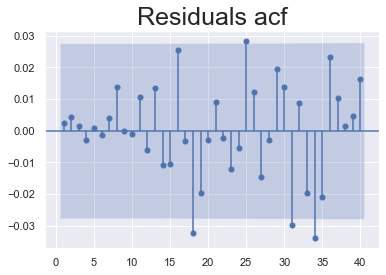

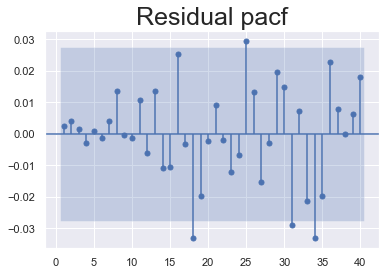

In [30]:
sgt.plot_acf(df_train.res_prices,lags=40,zero=False)
plt.title('Residuals acf',size=25)
sgt.plot_pacf(df_train.res_prices,lags=40,zero=False)
plt.title('Residual pacf',size=25);


<AxesSubplot:xlabel='date'>

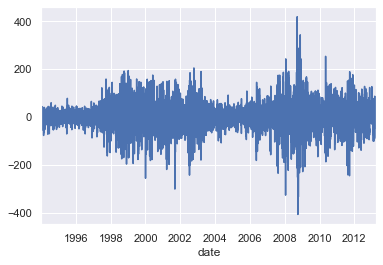

In [31]:
df_train.res_prices[1:].plot()



In [41]:
model_ret_res=ARMA(df_train.returns,order=(7,0))
model_ret_res_results=model_ret_res.fit()

D:\Users\sebas\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [46]:
df_train['res_returns']=model_ret_res_results.resid

In [49]:
sts.adfuller(df_train.res_returns)

(-70.83545931419621,
 0.0,
 0,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 15691.176299274448)

''

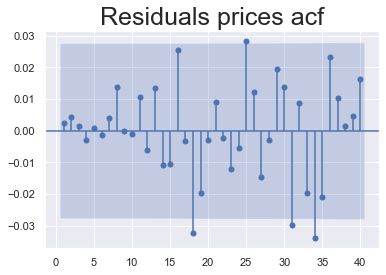

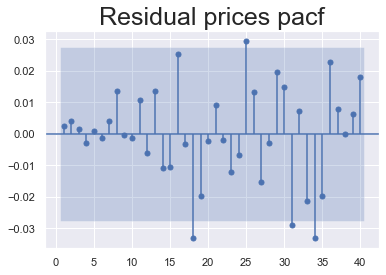

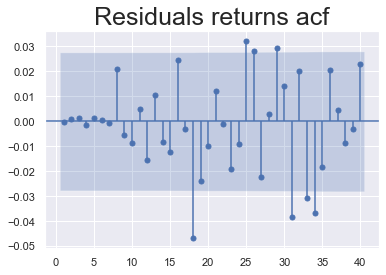

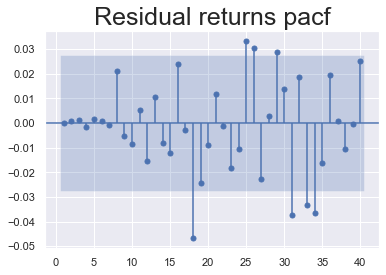

In [50]:
sgt.plot_acf(df_train.res_prices,lags=40,zero=False)
plt.title('Residuals prices acf',size=25)
sgt.plot_pacf(df_train.res_prices,lags=40,zero=False)
plt.title('Residual prices pacf',size=25)

sgt.plot_acf(df_train.res_returns,lags=40,zero=False)
plt.title('Residuals returns acf',size=25)
sgt.plot_pacf(df_train.res_returns,lags=40,zero=False)
plt.title('Residual returns pacf',size=25)
;

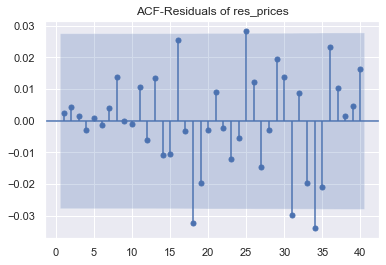

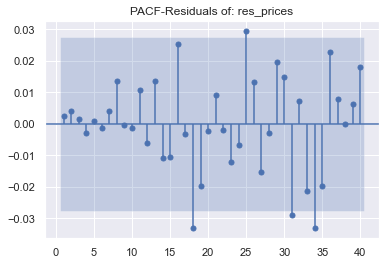

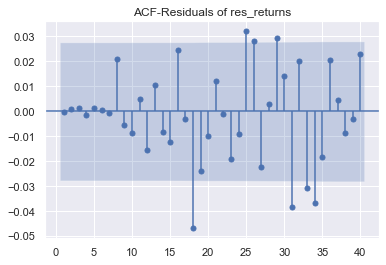

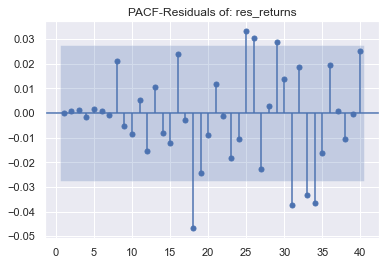

In [54]:
'''
sgt.plot_acf(df_train.res_prices,lags=40,zero=False)
plt.title('Residuals prices acf',size=25)
sgt.plot_pacf(df_train.res_prices,lags=40,zero=False)
plt.title('Residual prices pacf',size=25)

sgt.plot_acf(df_train.res_returns,lags=40,zero=False)
plt.title('Residuals returns acf',size=25)
sgt.plot_pacf(df_train.res_returns,lags=40,zero=False)
plt.title('Residual returns pacf',size=25)
;

Just for doing it a bit more smater
'''

columns=['res_prices','res_returns']

for i in columns:
    sgt.plot_acf(df_train[i],lags=40,zero=False)
    plt.title('ACF-Residuals of '+str(i))
    sgt.plot_pacf(df_train[i],lags=40,zero=False)
    plt.title('PACF-Residuals of: '+str(i))

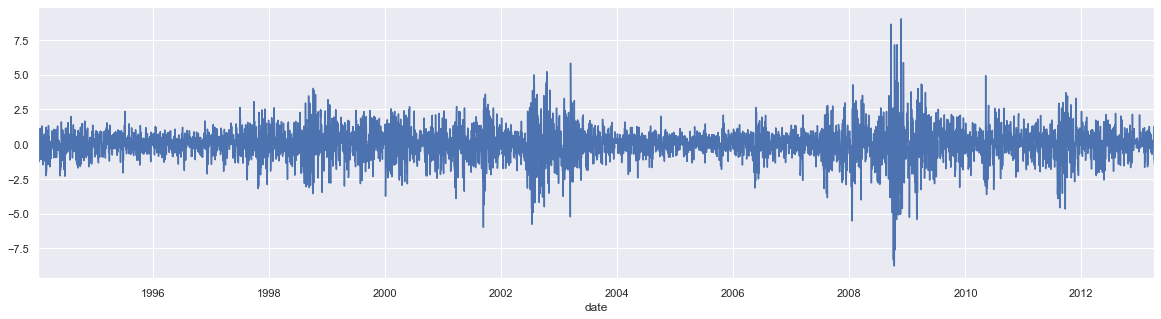

In [63]:
df_train.res_returns.plot(figsize=(20,5))

plt.show()


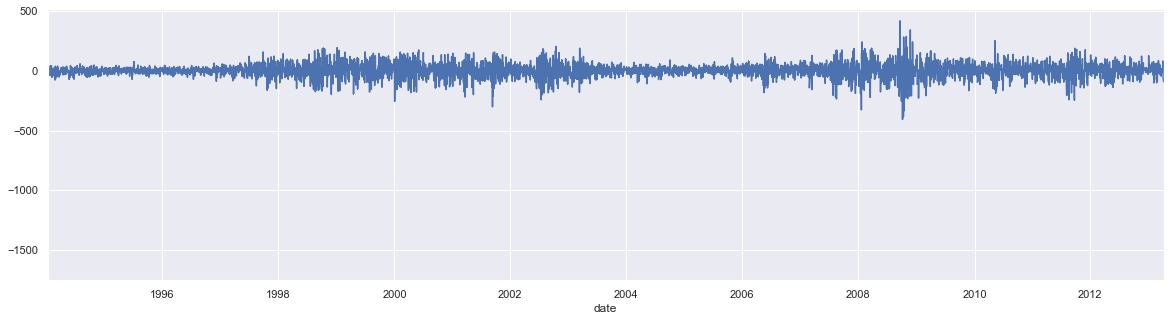

In [65]:
df_train.res_prices.plot(figsize=(20,5))
plt.show()